# Correlation to View Count using Regression

In [17]:
# Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# READING THE DATA

In [18]:
uncleaned = pd.read_csv('US_youtube_trending_data.csv', usecols=['categoryId', 'view_count', 'likes', 'dislikes', 'comment_count'])

# EDA

## Find duplicated rows and delete them

In [19]:
df = uncleaned.drop_duplicates()

## Density Graph

In [20]:
print(df['categoryId'].plot(kind='density'))
print('Skewness: ', df['categoryId'].skew())

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness:  -0.838758494447109


In [21]:
print(df['view_count'].plot(kind='density'))
print('Skewness: ', df['view_count'].skew())

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness:  12.551544190230409


In [23]:
print(df['likes'].plot(kind='density'))
print('Skewness: ', df['likes'].skew())

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness:  15.464545012557803


AxesSubplot(0.125,0.125;0.775x0.755)
Skewness:  31.70522783256828


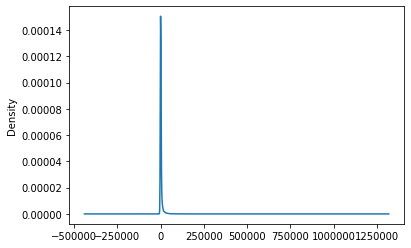

In [24]:
print(df['dislikes'].plot(kind='density'))
print('Skewness: ', df['dislikes'].skew())

In [25]:
print(df['comment_count'].plot(kind='density'))
print('Skewness: ', df['comment_count'].skew())

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness:  34.603405746606015


## Find outliers

### view_count

In [26]:
Q1 = df['view_count'].quantile(0.25, interpolation='lower')
Q3 = df['view_count'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR
print(f'RUB for view_count = {RUB}')
print(f'RLB for view_count = {RLB}')
counter = 0
for i in df['view_count']:
    if (i > RUB or i < RLB):
        counter += 1
print(f'Total outliers: {counter}')

RUB for view_count = 5376615.0
RLB for view_count = 0
Total outliers: 4554


### likes

In [27]:
Q1 = df['likes'].quantile(0.25, interpolation='lower')
Q3 = df['likes'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR
print(f'RUB for likes = {RUB}')
print(f'RLB for likes = {RLB}')
counter = 0
for i in df['likes']:
    if (i > RUB or i < RLB):
        counter += 1
print(f'Total outliers: {counter}')

RUB for likes = 296707.0
RLB for likes = 0
Total outliers: 4729


### dislikes

In [28]:
Q1 = df['dislikes'].quantile(0.25, interpolation='lower')
Q3 = df['dislikes'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR
print(f'RUB for dislikes = {RUB}')
print(f'RLB for dislikes = {RLB}')
counter = 0
for i in df['dislikes']:
    if (i > RUB or i < RLB):
        counter += 1
print(f'Total outliers: {counter}')

RUB for dislikes = 5750.0
RLB for dislikes = 0
Total outliers: 5045


### comment_count

In [29]:
Q1 = df['comment_count'].quantile(0.25, interpolation='lower')
Q3 = df['comment_count'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR
print(f'RUB for comment_count = {RUB}')
print(f'RLB for comment_count = {RLB}')
counter = 0
for i in df['comment_count']:
    if (i > RUB or i < RLB):
        counter += 1
print(f'Total outliers: {counter}')

RUB for comment_count = 23834.5
RLB for comment_count = 0
Total outliers: 4751


# DESCRIPTIVE STATISTICS

## categoryId

In [30]:
mode = df['categoryId'].mode()[0]
print(f'categoryId Mode: {mode}')

categoryId Mode: 10


## view_count

In [31]:
mean = df['view_count'].mean()
median = df['view_count'].median()
mode = df['view_count'].mode()[0]
print(f'view_count Mean: {mean}')
print(f'view_count Median: {median}')
print(f'view_count Mode: {mode}')

view_count Mean: 2693535.8296855697
view_count Median: 1101085.0
view_count Mode: 0


## likes

In [32]:
mean = df['likes'].mean()
median = df['likes'].median()
mode = df['likes'].mode()[0]
print(f'likes Mean: {mean}')
print(f'likes Median: {median}')
print(f'likes Mode: {mode}')

likes Mean: 150971.9659231289
likes Median: 51535.0
likes Mode: 0


## dislikes

In [33]:
mean = df['dislikes'].mean()
median = df['dislikes'].median()
mode = df['dislikes'].mode()[0]
print(f'dislikes Mean: {mean}')
print(f'dislikes Median: {median}')
print(f'dislikes Mode: {mode}')

dislikes Mean: 3509.1468661865138
dislikes Median: 917.0
dislikes Mode: 0


## comment_count

In [34]:
mean = df['comment_count'].mean()
median = df['comment_count'].median()
mode = df['comment_count'].mode()[0]
print(f'comment_count Mean: {mean}')
print(f'comment_count Median: {median}')
print(f'comment_count Mode: {mode}')

comment_count Mean: 16006.481015313615
comment_count Median: 4429.0
comment_count Mode: 0


# CORRELATION COMPUTATION

## categoryId and view_count (One Hot Encoding)

In [42]:
temp = pd.get_dummies(df['categoryId'])
temp['view_count'] = df['view_count']
plt.figure(figsize =(15,10))
sns.heatmap(temp.corr(method = 'pearson'), annot = True)

## Other columns

In [43]:
temp_unclean = pd.read_csv('US_youtube_trending_data.csv', usecols=['view_count', 'likes', 'dislikes', 'comment_count'])
temp_df = temp_unclean.drop_duplicates()
temp_df.corr(method = 'pearson')

view_count     likes  dislikes  comment_count
view_count       1.000000  0.868508  0.721961       0.693610
likes            0.868508  1.000000  0.707436       0.789031
dislikes         0.721961  0.707436  1.000000       0.664344
comment_count    0.693610  0.789031  0.664344       1.000000

# REGRESSION

## Linear Regression (With Outliers)

### likes & view_count

Slope: 12.742268081987723
Intercept: 769810.567028346
RMSE:  3129035.5288984454
R2 score:  0.7543060516050218
MAE:  1304798.025688852


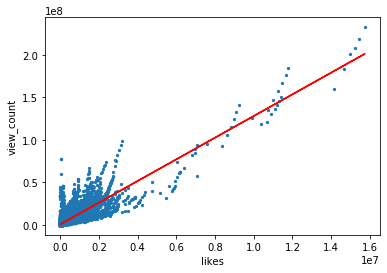

In [44]:
x = df[['likes']]
y = df['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
mae = mean_absolute_error(y, y_predicted)

print('Slope:' ,model.coef_[0])
print('Intercept:', model.intercept_)
print('RMSE: ', rmse)
print('R2 score: ', r2)
print('MAE: ', mae)
plt.scatter(x, y, s=5)
plt.xlabel('likes')
plt.ylabel('view_count')

plt.plot(x, y_predicted, color='r')
plt.show()

### dislikes & view_count

Slope: 273.21448735390163
Intercept: 1734786.067590871
RMSE:  4367952.88035284
R2 score:  0.5212273201947939
MAE:  1910238.736836956


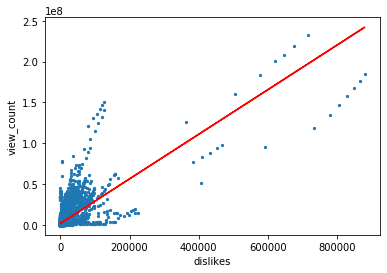

In [45]:
x = df[['dislikes']]
y = df['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
mae = mean_absolute_error(y, y_predicted)

print('Slope:' ,model.coef_[0])
print('Intercept:', model.intercept_)
print('RMSE: ', rmse)
print('R2 score: ', r2)
print('MAE: ', mae)

plt.scatter(x, y, s=5)
plt.xlabel('dislikes')
plt.ylabel('view_count')

plt.plot(x, y_predicted, color='r')
plt.show()

### comment_count & view_count

Slope: 39.19527837917848
Intercept: 2066157.3504193171
RMSE:  4547335.669026139
R2 score:  0.48109542715785614
MAE:  2122441.396490277


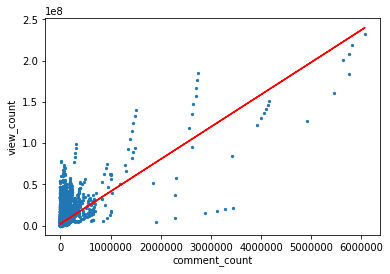

In [46]:
x = df[['comment_count']]
y = df['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
mae = mean_absolute_error(y, y_predicted)

print('Slope:' ,model.coef_[0])
print('Intercept:', model.intercept_)
print('RMSE: ', rmse)
print('R2 score: ', r2)
print('MAE: ', mae)

plt.scatter(x, y, s=5)
plt.xlabel('comment_count')
plt.ylabel('view_count')

plt.plot(x, y_predicted, color='r')
plt.show()

## Linear Regression (Without Outlier)

### likes & view_count

### dislikes & view_count

Slope: 652.7622466198993
Intercept: 520351.0456008302
RMSE:  791696.8136087991
R2 score:  0.47362595393873985
MAE:  549458.6612641397


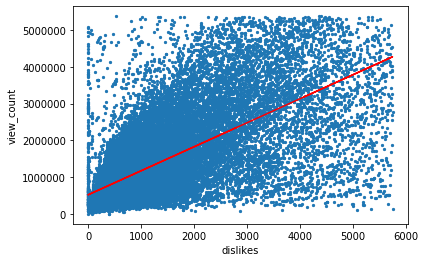

In [47]:
temp_unclean = pd.read_csv('US_youtube_trending_data.csv', usecols=['view_count', 'dislikes'])
temp = temp_unclean.drop_duplicates()

#dislikes
Q1 = temp['dislikes'].quantile(0.25, interpolation='lower')
Q3 = temp['dislikes'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR

#view_count
Q1v = temp['view_count'].quantile(0.25, interpolation='lower')
Q3v = temp['view_count'].quantile(0.75, interpolation='higher')
IQRv = Q3v - Q1v
RLBv = Q1v - (1.5)*IQRv
if RLBv < 0:
    RLBv = 0
RUBv = Q3v + (1.5)*IQRv

temp2 = temp.drop(temp[(temp.dislikes < RLB) | (temp.dislikes > RUB) | (temp.view_count < RLBv) | (temp.view_count > RUBv)].index)

x = temp2[['dislikes']]
y = temp2['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
mae = mean_absolute_error(y, y_predicted)

print('Slope:' ,model.coef_[0])
print('Intercept:', model.intercept_)
print('RMSE: ', rmse)
print('R2 score: ', r2)
print('MAE: ', mae)

plt.scatter(x, y, s=5)
plt.xlabel('dislikes')
plt.ylabel('view_count')

plt.plot(x, y_predicted, color='r')
plt.show()

### comment_count & view_count

Slope: 131.78944536455026
Intercept: 565828.5505919054
RMSE:  865447.8735812875
R2 score:  0.3531516896680189
MAE:  619476.499414652


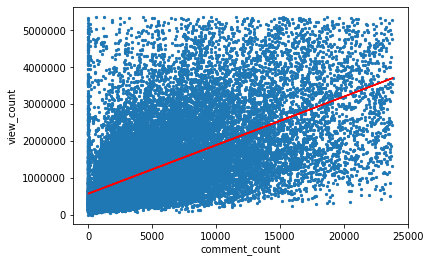

In [49]:
temp_unclean = pd.read_csv('US_youtube_trending_data.csv', usecols=['view_count', 'comment_count'])
temp = temp_unclean.drop_duplicates()

#comment_count
Q1 = temp['comment_count'].quantile(0.25, interpolation='lower')
Q3 = temp['comment_count'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR

#view_count
Q1v = temp['view_count'].quantile(0.25, interpolation='lower')
Q3v = temp['view_count'].quantile(0.75, interpolation='higher')
IQRv = Q3v - Q1v
RLBv = Q1v - (1.5)*IQRv
if RLBv < 0:
    RLBv = 0
RUBv = Q3v + (1.5)*IQRv

temp2 = temp.drop(temp[(temp.comment_count < RLB) | (temp.comment_count > RUB) | (temp.view_count < RLBv) | (temp.view_count > RUBv)].index)

x = temp2[['comment_count']]
y = temp2['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)
mae = mean_absolute_error(y, y_predicted)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)

print('Slope:' ,model.coef_[0])
print('Intercept:', model.intercept_)
print('RMSE: ', rmse)
print('R2 score: ', r2)
print('MAE: ', mae)

plt.scatter(x, y, s=5)
plt.xlabel('comment_count')
plt.ylabel('view_count')

plt.plot(x, y_predicted, color='r')
plt.show()

## Multiple Regression (With Outliers)

In [50]:
x = df[['likes', 'dislikes','comment_count']]
y = np.array(df['view_count'])

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  10.891220789423405
Coef. for dislikes:  84.76592981987383
Coef. for comment_count:  -2.312767785951195
Intercept: 788829.9924753266
Root mean squared error:  2973968.3201526166
MAE:  1251516.5267335004
R2 score:  0.8820740336466948


## Multiple Regression (Without Outliers)

In [52]:
temp_unclean = pd.read_csv('US_youtube_trending_data.csv', usecols=['view_count', 'comment_count', 'likes', 'dislikes'])
temp = temp_unclean.drop_duplicates()

#comment_count
Q1c = temp['comment_count'].quantile(0.25, interpolation='lower')
Q3c = temp['comment_count'].quantile(0.75, interpolation='higher')
IQRc = Q3c - Q1c
RLBc = Q1c - (1.5)*IQRc
if RLBc < 0:
    RLBc = 0
RUBc = Q3c + (1.5)*IQRc

#view_count
Q1v = temp['view_count'].quantile(0.25, interpolation='lower')
Q3v = temp['view_count'].quantile(0.75, interpolation='higher')
IQRv = Q3v - Q1v
RLBv = Q1v - (1.5)*IQRv
if RLBv < 0:
    RLBv = 0
RUBv = Q3v + (1.5)*IQRv
                                                            
#likes
Q1l = temp['likes'].quantile(0.25, interpolation='lower')
Q3l = temp['likes'].quantile(0.75, interpolation='higher')
IQRl = Q3l - Q1l
RLBl = Q1l - (1.5)*IQRl
if RLBl < 0:
    RLBl = 0
RUBl = Q3l + (1.5)*IQRl

#dislikes
Q1d = temp['dislikes'].quantile(0.25, interpolation='lower')
Q3d = temp['dislikes'].quantile(0.75, interpolation='higher')
IQRd = Q3d - Q1d
RLBd = Q1d - (1.5)*IQRd
if RLBd < 0:
    RLBd = 0
RUBd = Q3d + (1.5)*IQRd


temp2 = temp.drop(temp[(temp.comment_count < RLBc) | (temp.comment_count > RUBc) | (temp.view_count < RLBv) | (temp.view_count > RUBv) | (temp.likes < RLBl) | (temp.likes > RUBl) | (temp.dislikes < RLBd) | (temp.dislikes > RUBd)].index)

x = temp2[['likes', 'dislikes','comment_count']]
y = np.array(temp2['view_count'])

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  7.4504535549709265
Coef. for dislikes:  379.0093132896615
Coef. for comment_count:  5.2868568232804725
Intercept: 308261.2430068053
Root mean squared error:  654270.6354866263
MAE:  442078.6684889451
R2 score:  0.7522034828310242


## Polynomial Regression (With Outliers)

### likes & view_count

Coef.:  [ 5.42791956e-14 -8.21146973e-07  1.43480989e+01  6.26511869e+05]
Order:  3
Coef for x^0:  5.427919560714931e-14
Coef for x^1  -8.211469734754628e-07
Coef for x^2:  14.348098885651051
Coef for x^3:  626511.8694347392


R sq:  0.7596834755679173
RMSE:  3094603.994479908
MAE:  1275192.2899493717


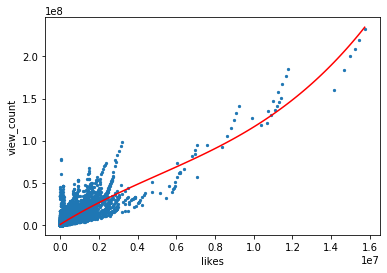

In [53]:
x = df['likes']
y = df['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 15735533, 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y, s=5)
plt.xlabel('likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

### dislikes & view_count

Coef.:  [ 6.85737835e-10 -8.99344253e-04  4.93398785e+02  1.12050010e+06]
Order:  3
Coef for x^0:  6.857378352498655e-10
Coef for x^1  -0.0008993442529747074
Coef for x^2:  493.39878513535973
Coef for x^3:  1120500.1027748843


R sq:  0.5860925720039216
RMSE:  4061298.163564034
MAE:  1585751.671574455


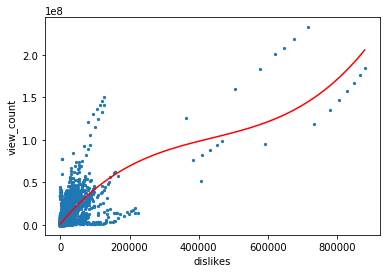

In [54]:
x = df['dislikes']
y = df['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 879354, 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('dislikes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

### comment_count & view_count

Coef.:  [ 4.21729196e-12 -3.50779306e-05  9.81077296e+01  1.36393348e+06]
Order:  3
Coef for x^0:  4.217291955103884e-12
Coef for x^1  -3.507793057426574e-05
Coef for x^2:  98.10772959935744
Coef for x^3:  1363933.4774324945


R sq:  0.5769277572290411
RMSE:  4106014.9940466527
MAE:  1751295.7542093836


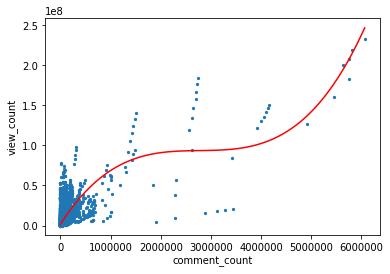

In [55]:
x = df['comment_count']
y = df['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 6065230, 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('comment_count')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

## Polynomial Regression (Without Outliers)

### likes & view_count

Coef.:  [-5.16527331e-11  7.40352974e-06  1.27160081e+01  4.71460157e+05]
Order:  3
Coef for x^0:  -5.165273308933196e-11
Coef for x^1  7.403529742915163e-06
Coef for x^2:  12.716008088991197
Coef for x^3:  471460.1567176577


R sq:  0.47546093680503454
RMSE:  781845.6692153134
MAE:  556129.978404218


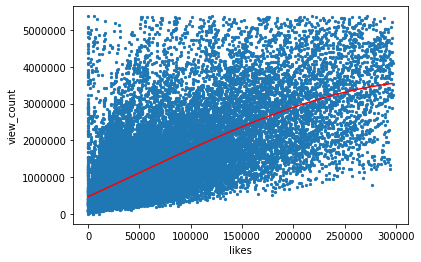

In [57]:
temp_unclean = pd.read_csv('US_youtube_trending_data.csv', usecols=['view_count', 'likes'])
temp = temp_unclean.drop_duplicates()

#likes
Q1 = temp['likes'].quantile(0.25, interpolation='lower')
Q3 = temp['likes'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR

#view_count
Q1v = temp['view_count'].quantile(0.25, interpolation='lower')
Q3v = temp['view_count'].quantile(0.75, interpolation='higher')
IQRv = Q3v - Q1v
RLBv = Q1v - (1.5)*IQRv
if RLBv < 0:
    RLBv = 0
RUBv = Q3v + (1.5)*IQRv

temp2 = temp.drop(temp[(temp.likes < RLB) | (temp.likes > RUB) | (temp.view_count < RLBv) | (temp.view_count > RUBv)].index)

x = temp2['likes']
y = temp2['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 296180, 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y, s=5)
plt.xlabel('likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

### dislikes & view_count

Coef.:  [-2.04150945e-06 -1.21733547e-01  1.19993209e+03  2.31664855e+05]
Order:  3
Coef for x^0:  -2.041509451555367e-06
Coef for x^1  -0.12173354692209655
Coef for x^2:  1199.9320897320829
Coef for x^3:  231664.8548989879


R sq:  0.5182719411154022
RMSE:  757377.9112658477
MAE:  512522.0228309048


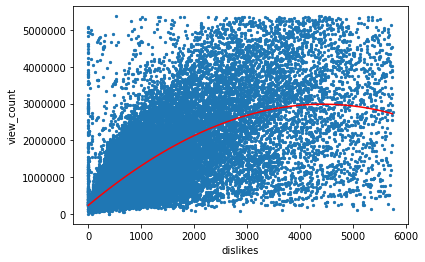

In [58]:
temp_unclean = pd.read_csv('US_youtube_trending_data.csv', usecols=['view_count', 'dislikes'])
temp= temp_unclean.drop_duplicates()

#dislikes
Q1 = temp['dislikes'].quantile(0.25, interpolation='lower')
Q3 = temp['dislikes'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR

#view_count
Q1v = temp['view_count'].quantile(0.25, interpolation='lower')
Q3v = temp['view_count'].quantile(0.75, interpolation='higher')
IQRv = Q3v - Q1v
RLBv = Q1v - (1.5)*IQRv
if RLBv < 0:
    RLBv = 0
RUBv = Q3v + (1.5)*IQRv

temp2 = temp.drop(temp[(temp.dislikes < RLB) | (temp.dislikes > RUB) | (temp.view_count < RLBv) | (temp.view_count > RUBv)].index)

x = temp2['dislikes']
y = temp2['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 5741, 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y, s=5)
plt.xlabel('dislikes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

### comment_count & view_count

In [59]:
temp_unclean = pd.read_csv('US_youtube_trending_data.csv', usecols=['view_count', 'comment_count'])
temp= temp_unclean.drop_duplicates()

#comment_count
Q1 = temp['comment_count'].quantile(0.25, interpolation='lower')
Q3 = temp['comment_count'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
RLB = Q1 - (1.5)*IQR
if RLB < 0:
    RLB = 0
RUB = Q3 + (1.5)*IQR

#view_count
Q1v = temp['view_count'].quantile(0.25, interpolation='lower')
Q3v = temp['view_count'].quantile(0.75, interpolation='higher')
IQRv = Q3v - Q1v
RLBv = Q1v - (1.5)*IQRv
if RLBv < 0:
    RLBv = 0
RUBv = Q3v + (1.5)*IQRv

temp2 = temp.drop(temp[(temp.comment_count < RLB) | (temp.comment_count > RUB) | (temp.view_count < RLBv) | (temp.view_count > RUBv)].index)

x = temp2['comment_count']
y = temp2['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 23798, 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y, s=5)
plt.xlabel('comment_count')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

Coef.:  [-9.79371184e-08 -3.33231641e-04  1.67777539e+02  4.61792688e+05]
Order:  3
Coef for x^0:  -9.79371184046063e-08
Coef for x^1  -0.0003332316407112824
Coef for x^2:  167.77753938248307
Coef for x^3:  461792.68840660906


R sq:  0.3618477952882151
RMSE:  859610.7305580605
MAE:  613125.6515895057


## ADDITIONAL

In [119]:
df.categoryId.unique()

array([22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29],
      dtype=int64)

In [124]:
temp_unclean = pd.read_csv('US_youtube_trending_data.csv', usecols=['view_count', 'comment_count', 'likes', 'dislikes', 'categoryId'])
temp = temp_unclean.drop_duplicates()

#comment_count
Q1c = temp['comment_count'].quantile(0.25, interpolation='lower')
Q3c = temp['comment_count'].quantile(0.75, interpolation='higher')
IQRc = Q3c - Q1c
RLBc = Q1c - (1.5)*IQRc
if RLBc < 0:
    RLBc = 0
RUBc = Q3c + (1.5)*IQRc

#view_count
Q1v = temp['view_count'].quantile(0.25, interpolation='lower')
Q3v = temp['view_count'].quantile(0.75, interpolation='higher')
IQRv = Q3v - Q1v
RLBv = Q1v - (1.5)*IQRv
if RLBv < 0:
    RLBv = 0
RUBv = Q3v + (1.5)*IQRv
                                                            
#likes
Q1l = temp['likes'].quantile(0.25, interpolation='lower')
Q3l = temp['likes'].quantile(0.75, interpolation='higher')
IQRl = Q3l - Q1l
RLBl = Q1l - (1.5)*IQRl
if RLBl < 0:
    RLBl = 0
RUBl = Q3l + (1.5)*IQRl

#dislikes
Q1d = temp['dislikes'].quantile(0.25, interpolation='lower')
Q3d = temp['dislikes'].quantile(0.75, interpolation='higher')
IQRd = Q3d - Q1d
RLBd = Q1d - (1.5)*IQRd
if RLBd < 0:
    RLBd = 0
RUBd = Q3d + (1.5)*IQRd


temp2 = temp.drop(temp[(temp.comment_count < RLBc) | (temp.comment_count > RUBc) | (temp.view_count < RLBv) | (temp.view_count > RUBv) | (temp.likes < RLBl) | (temp.likes > RUBl) | (temp.dislikes < RLBd) | (temp.dislikes > RUBd)].index)

### Polynomial Regression Without Outliers

#### People & Blogs

Coef.:  [-1.88278522e-10  6.55505322e-05  6.42068424e+00  4.60899627e+05]
Order:  3
Coef for x^0:  -1.8827852163319194e-10
Coef for x^1  6.555053222898081e-05
Coef for x^2:  6.42068423719953
Coef for x^3:  460899.627233418


R sq:  0.5245243629776708
RMSE:  750429.1337363527
MAE:  504350.8607810699


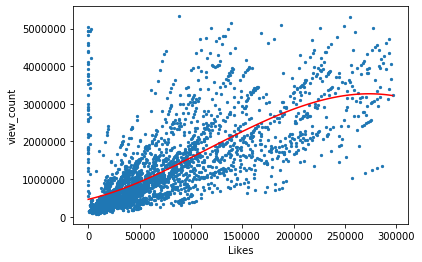

In [158]:
temp3 = temp2.loc[df['categoryId'] == 22]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Gaming

Coef.:  [-4.49046940e-12 -2.91508165e-05  2.07842534e+01  1.82709769e+05]
Order:  3
Coef for x^0:  -4.490469399571256e-12
Coef for x^1  -2.915081648719565e-05
Coef for x^2:  20.78425339562827
Coef for x^3:  182709.7689794813


R sq:  0.5874557558798026
RMSE:  706907.3101460013
MAE:  481402.77121055214


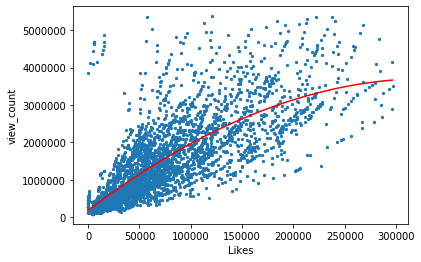

In [159]:
temp3 = temp2.loc[df['categoryId'] == 20]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Entertainment

In [160]:
temp3 = temp2.loc[df['categoryId'] == 24]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

Coef.:  [-1.21225032e-10  3.41429495e-05  9.67516260e+00  4.98656530e+05]
Order:  3
Coef for x^0:  -1.2122503225654242e-10
Coef for x^1  3.4142949511929e-05
Coef for x^2:  9.675162596680618
Coef for x^3:  498656.5303517542


R sq:  0.47694401026144173
RMSE:  708381.5257674651
MAE:  481424.12069418904


#### Music

Coef.:  [-2.69589925e-11 -1.14655747e-05  1.58871361e+01  1.83793952e+05]
Order:  3
Coef for x^0:  -2.6958992505049918e-11
Coef for x^1  -1.1465574696733196e-05
Coef for x^2:  15.887136144931302
Coef for x^3:  183793.95215263328


R sq:  0.4961444224898758
RMSE:  734219.8773927352
MAE:  510858.72687563364


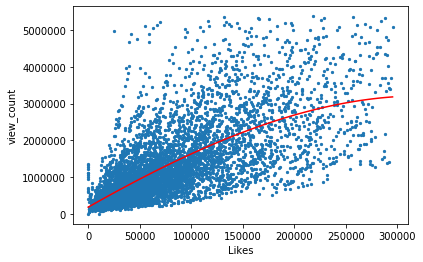

In [161]:
temp3 = temp2.loc[df['categoryId'] == 10]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### How-to & Style

In [162]:
temp3 = temp2.loc[df['categoryId'] == 26]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

Coef.:  [-3.31315207e-11  2.68757564e-05  1.24500742e+01  1.85975300e+05]
Order:  3
Coef for x^0:  -3.3131520665997353e-11
Coef for x^1  2.6875756373423386e-05
Coef for x^2:  12.450074249730283
Coef for x^3:  185975.3001947585


R sq:  0.6944413050388349
RMSE:  503612.11262082285
MAE:  324648.4726728557


#### Education

In [163]:
temp3 = temp2.loc[df['categoryId'] == 27]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

Coef.:  [ 8.07329571e-11 -3.19986544e-05  1.55882093e+01  7.92298303e+04]
Order:  3
Coef for x^0:  8.073295707670338e-11
Coef for x^1  -3.1998654430343854e-05
Coef for x^2:  15.588209275289701
Coef for x^3:  79229.83034449484


R sq:  0.7005869110656748
RMSE:  465582.5235178132
MAE:  276508.35903491103


#### Comedy

Coef.:  [ 1.59890317e-10 -5.11734313e-05  1.35293131e+01  2.26508057e+05]
Order:  3
Coef for x^0:  1.598903171713697e-10
Coef for x^1  -5.117343134242462e-05
Coef for x^2:  13.5293130507749
Coef for x^3:  226508.0566481276


R sq:  0.5134051025893047
RMSE:  524520.2807560562
MAE:  372069.57340117404


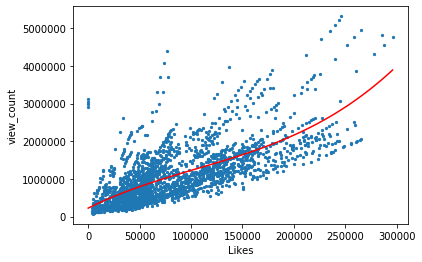

In [164]:
temp3 = temp2.loc[df['categoryId'] == 23]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Science & Technology

Coef.:  [-5.12839388e-10  1.35188883e-04  1.01559041e+01  3.30573448e+05]
Order:  3
Coef for x^0:  -5.128393880929378e-10
Coef for x^1  0.00013518888286860202
Coef for x^2:  10.155904108938383
Coef for x^3:  330573.4476147493


R sq:  0.7407944221159131
RMSE:  554555.9571706221
MAE:  376676.4183765946


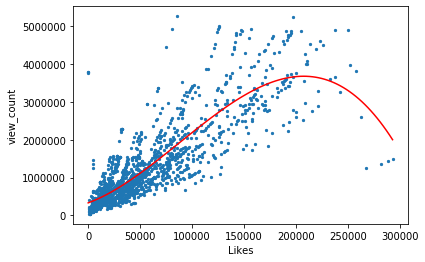

In [165]:
temp3 = temp2.loc[df['categoryId'] == 28]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Film & Animation

Coef.:  [-3.40020716e-10  1.01083606e-04  4.20388167e+00  4.84645185e+05]
Order:  3
Coef for x^0:  -3.400207159035379e-10
Coef for x^1  0.00010108360642236054
Coef for x^2:  4.2038816723741155
Coef for x^3:  484645.1848648996


R sq:  0.3770932276064236
RMSE:  807946.346279519
MAE:  537248.8968248672


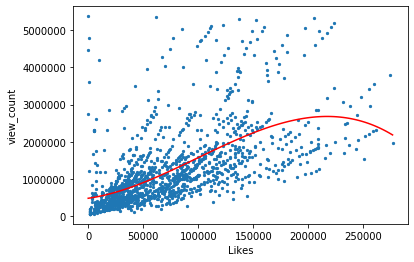

In [166]:
temp3 = temp2.loc[df['categoryId'] == 1]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### News & Politics

Coef.:  [ 3.46458173e-09 -9.94262632e-04  8.09837998e+01  1.82827526e+05]
Order:  3
Coef for x^0:  3.464581731385503e-09
Coef for x^1  -0.000994262632085974
Coef for x^2:  80.98379982231067
Coef for x^3:  182827.5255852723


R sq:  0.5681488677930442
RMSE:  470291.07307025895
MAE:  310377.9537946235


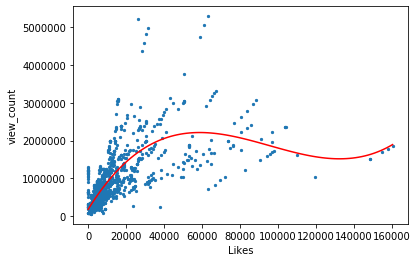

In [167]:
temp3 = temp2.loc[df['categoryId'] == 25]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Sports

Coef.:  [ 7.88934734e-10 -3.83798835e-04  6.10495693e+01  2.24785199e+05]
Order:  3
Coef for x^0:  7.889347335010621e-10
Coef for x^1  -0.0003837988354637439
Coef for x^2:  61.04956934690815
Coef for x^3:  224785.19862490924


R sq:  0.5653660302351728
RMSE:  637500.0178531695
MAE:  449806.23044686305


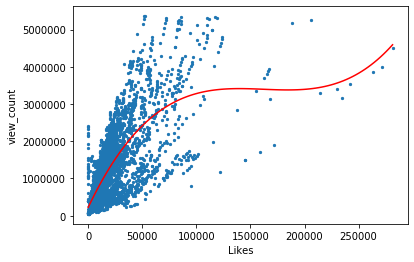

In [168]:
temp3 = temp2.loc[df['categoryId'] == 17]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Travel & Events

Coef.:  [ 3.52875325e-09 -3.24734528e-04  2.08528800e+01  1.83075856e+05]
Order:  3
Coef for x^0:  3.5287532513858597e-09
Coef for x^1  -0.00032473452752799223
Coef for x^2:  20.85287995063491
Coef for x^3:  183075.85625001672


R sq:  0.3318513171992329
RMSE:  213907.4524552465
MAE:  163007.20331204377


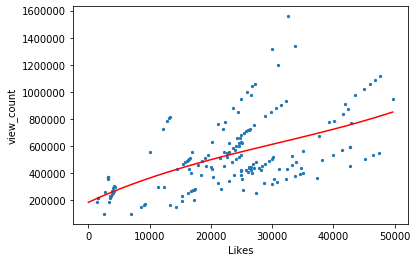

In [169]:
temp3 = temp2.loc[df['categoryId'] == 19]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Pets & Animals

Coef.:  [-6.51438800e-10  2.34540536e-04  1.90151671e+00  3.14804339e+05]
Order:  3
Coef for x^0:  -6.51438799527637e-10
Coef for x^1  0.00023454053637310854
Coef for x^2:  1.901516710949011
Coef for x^3:  314804.338684192


R sq:  0.770409629433866
RMSE:  422767.7292659127
MAE:  316802.1926849055


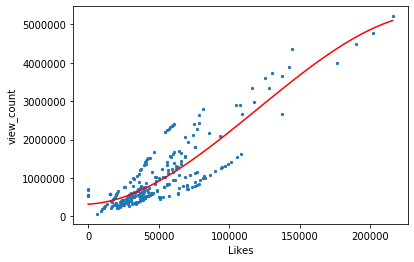

In [170]:
temp3 = temp2.loc[df['categoryId'] == 15]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Autos & Vehicles

Coef.:  [-4.51528508e-10  7.90924115e-05  1.61653189e+01  3.31404251e+05]
Order:  3
Coef for x^0:  -4.51528508027035e-10
Coef for x^1  7.909241149448351e-05
Coef for x^2:  16.16531889239035
Coef for x^3:  331404.25075442827


R sq:  0.37545854676802426
RMSE:  674625.7608842314
MAE:  431325.61778888904


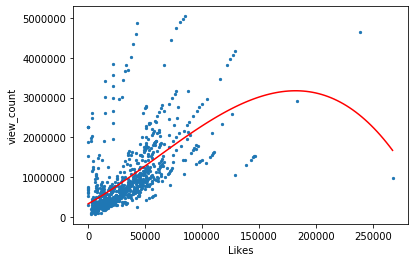

In [171]:
temp3 = temp2.loc[df['categoryId'] == 2]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

#### Nonprofits & Activism

Coef.:  [ 3.39678886e-08 -4.44417342e-03  1.57738797e+02 -4.78282407e+05]
Order:  3
Coef for x^0:  3.396788860932226e-08
Coef for x^1  -0.004444173417013499
Coef for x^2:  157.73879723189856
Coef for x^3:  -478282.40718382236


R sq:  0.16714492667176106
RMSE:  740666.8006385299
MAE:  520694.26955553534


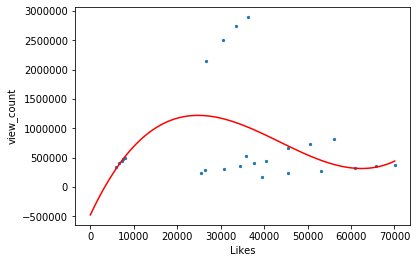

In [157]:
temp3 = temp2.loc[df['categoryId'] == 29]

x = temp3['likes']
y = temp3['view_count']

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, x.max(), 100)

rmse = np.sqrt(mean_squared_error(y, mymodel(x)))
mae = mean_absolute_error(y, mymodel(x))

print('Coef.: ', mymodel.c)
print('Order: ', mymodel.o)
print('Coef for x^0: ', mymodel.c[0])
print('Coef for x^1 ', mymodel.c[1])
print('Coef for x^2: ', mymodel.c[2])
print('Coef for x^3: ', mymodel.c[3])
print('\n')
print('R sq: ',r2_score(y, mymodel(x)))
print('RMSE: ', rmse)
print('MAE: ', mae)
plt.scatter(x, y,s=5)
plt.xlabel('Likes')
plt.ylabel('view_count')
plt.plot(myline, mymodel(myline), color = 'r')
plt.show()

### Multiple Regression Without Outliers

#### People & Blogs

In [175]:
temp3 = temp2.loc[df['categoryId'] == 22]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  7.492609181193279
Coef. for dislikes:  326.0972428281029
Coef. for comment_count:  18.214810583230694
Intercept: 223425.45272174536
Root mean squared error:  671221.2983791878
MAE:  431160.76413870987
R2 score:  0.7871468322084904


#### Gaming

In [176]:
temp3 = temp2.loc[df['categoryId'] == 20]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  10.456911397026898
Coef. for dislikes:  384.57109370817057
Coef. for comment_count:  -8.525713871404902
Intercept: 200290.46128852945
Root mean squared error:  621325.3750954084
MAE:  399336.92318221775
R2 score:  0.8254082318037905


#### Entertainment

In [177]:
temp3 = temp2.loc[df['categoryId'] == 24]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  7.91292770229869
Coef. for dislikes:  320.4964785926106
Coef. for comment_count:  7.356760815826584
Intercept: 329499.4645510592
Root mean squared error:  648726.0128349524
MAE:  426580.8688071626
R2 score:  0.749220660606436


#### Music

In [178]:
temp3 = temp2.loc[df['categoryId'] == 10]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  11.298854912068974
Coef. for dislikes:  397.4028297628267
Coef. for comment_count:  -63.12204177194482
Intercept: 235091.92826337134
Root mean squared error:  640129.307523505
MAE:  430860.7075218771
R2 score:  0.7854988401887113


#### How-to & Style

In [180]:
temp3 = temp2.loc[df['categoryId'] == 26]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  11.15767107331016
Coef. for dislikes:  365.16568782929323
Coef. for comment_count:  -4.913004218287657
Intercept: 52535.98494760052
Root mean squared error:  430112.95459491026
MAE:  271800.60376616777
R2 score:  0.8815451884929101


#### Education

In [181]:
temp3 = temp2.loc[df['categoryId'] == 27]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  14.157037160873614
Coef. for dislikes:  291.29385512175037
Coef. for comment_count:  -62.83776597417838
Intercept: 120639.08305661543
Root mean squared error:  416441.8424126732
MAE:  249310.6477662452
R2 score:  0.872041010496878


#### Comedy

In [182]:
temp3 = temp2.loc[df['categoryId'] == 23]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  7.385793704901075
Coef. for dislikes:  363.6147376591918
Coef. for comment_count:  0.132535932375728
Intercept: 123354.23045047361
Root mean squared error:  448783.2829720188
MAE:  309114.1899756293
R2 score:  0.8023600320833731


#### Science & Technology

In [183]:
temp3 = temp2.loc[df['categoryId'] == 28]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  14.849307030367777
Coef. for dislikes:  328.90929256744124
Coef. for comment_count:  -39.74240360191203
Intercept: 192444.5704583535
Root mean squared error:  525755.7927006944
MAE:  329821.95854869287
R2 score:  0.875795835278524


#### Film & Animation

In [184]:
temp3 = temp2.loc[df['categoryId'] == 1]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  4.817064443346055
Coef. for dislikes:  520.333490162352
Coef. for comment_count:  20.449805462023786
Intercept: 179195.9742822094
Root mean squared error:  652854.1124106421
MAE:  403177.1987892724
R2 score:  0.7702498935007787


#### News & Politics

In [185]:
temp3 = temp2.loc[df['categoryId'] == 25]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  17.31059941616128
Coef. for dislikes:  107.06521177168503
Coef. for comment_count:  27.42813897430893
Intercept: 355776.13343179866
Root mean squared error:  528331.7499575239
MAE:  350954.6698989745
R2 score:  0.674520589367077


#### Sports

In [186]:
temp3 = temp2.loc[df['categoryId'] == 17]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  14.639954704704031
Coef. for dislikes:  390.24541100214225
Coef. for comment_count:  93.41608922905034
Intercept: 297891.47922928305
Root mean squared error:  581462.9314517365
MAE:  415816.43569680006
R2 score:  0.7990103629804561


#### Travel & Events

In [187]:
temp3 = temp2.loc[df['categoryId'] == 19]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  12.693030259762509
Coef. for dislikes:  87.75636023750008
Coef. for comment_count:  -7.688466340220809
Intercept: 199215.7716164344
Root mean squared error:  205909.0832481947
MAE:  156472.42987835492
R2 score:  0.6171576930596947


#### Pets & Animals

In [188]:
temp3 = temp2.loc[df['categoryId'] == 15]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  19.008252790764708
Coef. for dislikes:  525.725919283449
Coef. for comment_count:  -28.19286558202097
Intercept: -182646.69377632276
Root mean squared error:  345547.0959202246
MAE:  256966.1170283799
R2 score:  0.9201203689148906


#### Autos & Vehicles

In [189]:
temp3 = temp2.loc[df['categoryId'] == 2]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  8.328834229835515
Coef. for dislikes:  683.6742425759735
Coef. for comment_count:  -17.231866032653226
Intercept: 241960.77999838395
Root mean squared error:  621957.2348590686
MAE:  371849.2819592422
R2 score:  0.6849589457340005


#### Nonprofits & Activism

In [190]:
temp3 = temp2.loc[df['categoryId'] == 29]

x = temp3[['likes', 'dislikes','comment_count']]
y = temp3['view_count']

model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = np.sqrt(r2_score(y, y_predicted))
mae = mean_absolute_error(y, y_predicted)

print('Coef. for likes: ', model.coef_[0])
print('Coef. for dislikes: ', model.coef_[1])
print('Coef. for comment_count: ', model.coef_[2])
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('MAE: ', mae)
print('R2 score: ', r2)

Coef. for likes:  -22.619704780840358
Coef. for dislikes:  3746.1985235909224
Coef. for comment_count:  -139.95962697410297
Intercept: 360942.0981522115
Root mean squared error:  458743.0623897408
MAE:  350977.1974603173
R2 score:  0.8249278796812257
